# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/roulette/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=RouletteWheelSelectionFilter(roulette_pointer_count=4z),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            double_parabolic_params
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/roulette/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: RouletteWheelSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

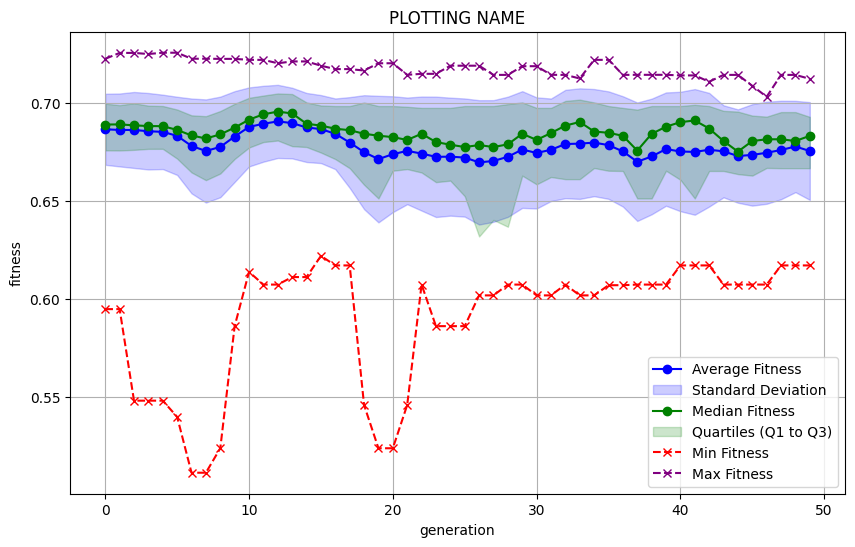

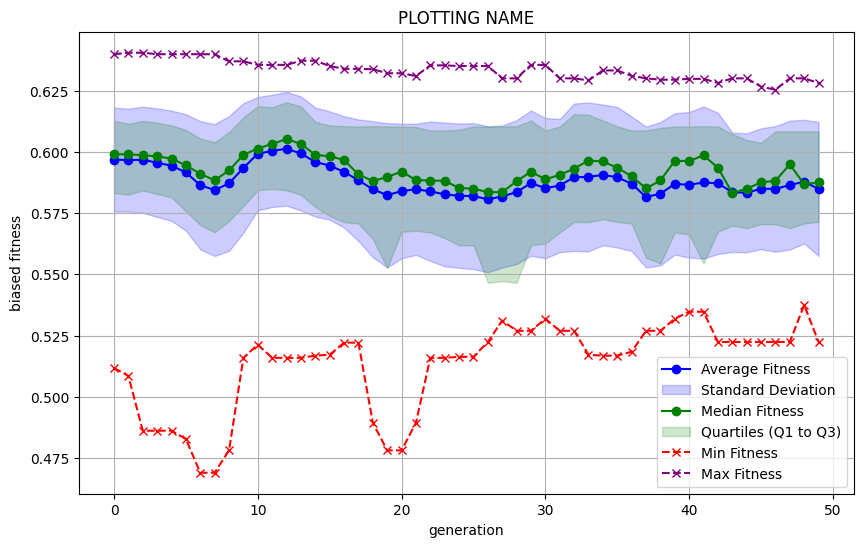

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_2: ['DoubleParabolicShape_19', 'GridStrictTransformation_161']
predict: (0.29529326490896923, 374.17961059999993, 461.31480619999996)
biased_fitness: 0.5223666258744311, fitness: 0.6195952669103081
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


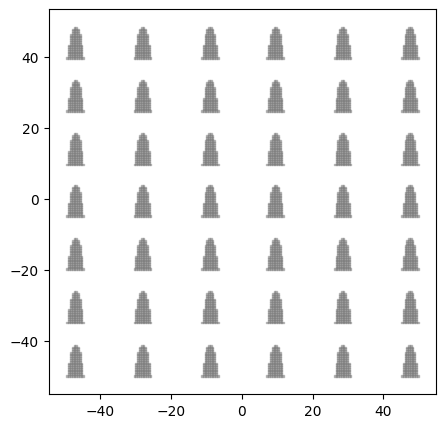

--------------------------------------------------
label: VentHole Chromosome_257: ['DoubleParabolicShape_161', 'GridStrictTransformation_257']
predict: (0.29164455428120384, 373.3447503000001, 456.3761775999999)
biased_fitness: 0.5875001333631459, fitness: 0.6849498176879616
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


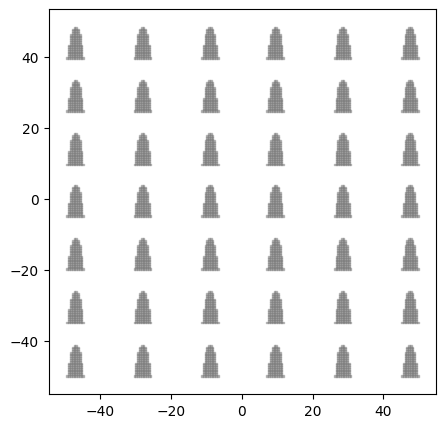

--------------------------------------------------
label: VentHole Chromosome_161: ['DoubleParabolicShape_152', 'GridStrictTransformation_336']
predict: (0.29280628783545515, 373.69196699999986, 457.5771798999998)
biased_fitness: 0.5670977755036288, fitness: 0.6655913871454501
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


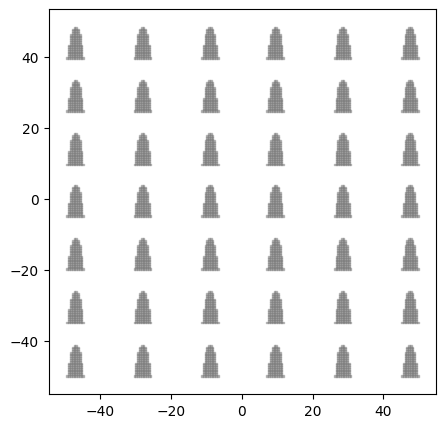

--------------------------------------------------
label: VentHole Chromosome_152: ['DoubleParabolicShape_161', 'CornerTransformation_161']
predict: (0.2897606132655435, 373.75339639999993, 458.1094694999997)
biased_fitness: 0.6083654932823921, fitness: 0.6930795378445669
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 7.868302777121464, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


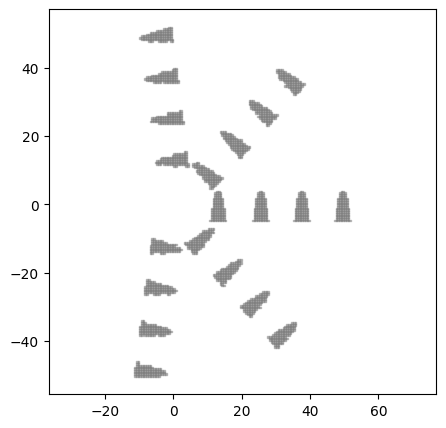

--------------------------------------------------
label: VentHole Chromosome_418: ['DoubleParabolicShape_336', 'GridStrictTransformation_161']
predict: (0.2919341432624831, 372.6420852999999, 456.0661435999998)
biased_fitness: 0.5875792806252369, fitness: 0.6871174228751701
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


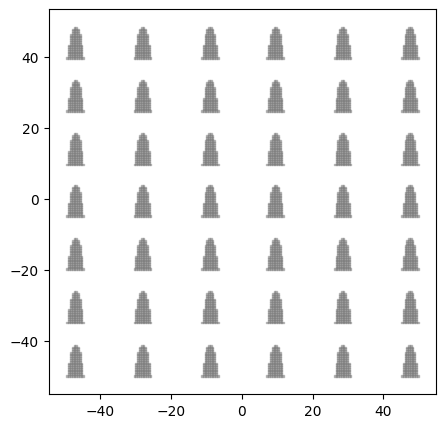

--------------------------------------------------
label: VentHole Chromosome_50: ['DoubleParabolicShape_262', 'GridStrictTransformation_155']
predict: (0.29080178162604087, 373.12524889999986, 456.5260012999999)
biased_fitness: 0.6000968101354287, fitness: 0.6937259327395925
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


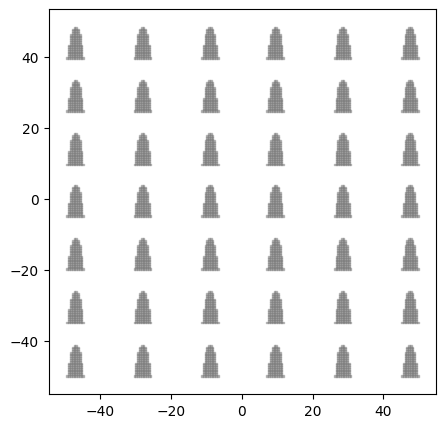

--------------------------------------------------
label: VentHole Chromosome_2: ['DoubleParabolicShape_50', 'CircularStrictTransformation_490']
predict: (0.2902650387881367, 373.73824400000007, 458.7249112)
biased_fitness: 0.6001484145660858, fitness: 0.6850338361186326
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 14.117628975678018, dx: 7.8961360965572975, phi: 0.7853981633974483, ]


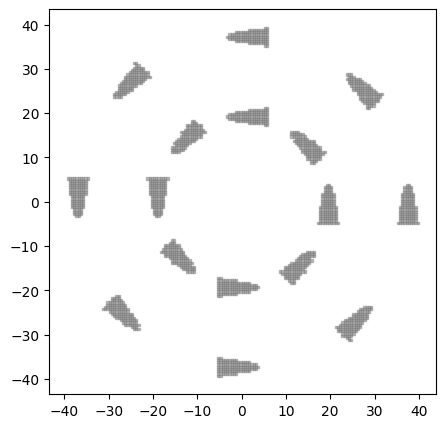

--------------------------------------------------
label: VentHole Chromosome_336: ['DoubleParabolicShape_336', 'GridStrictTransformation_329']
predict: (0.29284739093151835, 372.2015135999999, 454.75145949999984)
biased_fitness: 0.5796260399587438, fitness: 0.6867612251848177
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


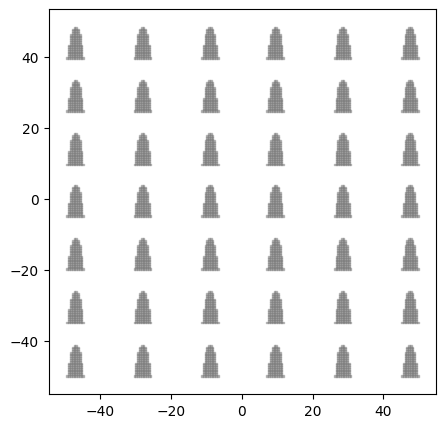

--------------------------------------------------
label: VentHole Chromosome_50: ['DoubleParabolicShape_336', 'GridStrictTransformation_50']
predict: (0.29341051875450463, 374.0454120999998, 462.72474009999974)
biased_fitness: 0.5465761967369365, fitness: 0.6320440514549559
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


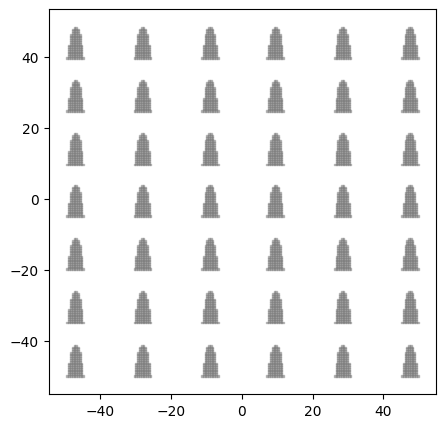

--------------------------------------------------
label: VentHole Chromosome_155: ['DoubleParabolicShape_329', 'GridStrictTransformation_50']
predict: (0.2928993982286874, 373.79906549999987, 457.3416741999997)
biased_fitness: 0.5657297488983778, fitness: 0.6653023192131282
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


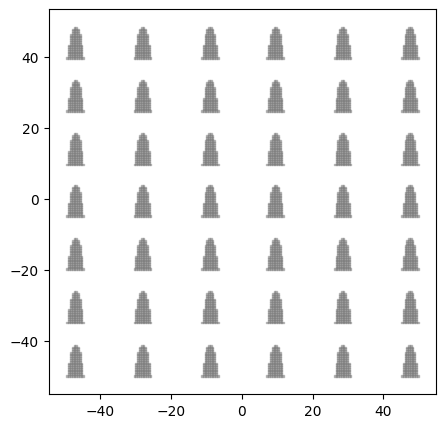

--------------------------------------------------
label: VentHole Chromosome_304: ['DoubleParabolicShape_13', 'CornerTransformation_336']
predict: (0.29009837252776216, 373.8957284999999, 460.16560729999975)
biased_fitness: 0.5988129275113305, fitness: 0.67870959572238
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 7.868302777121464, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


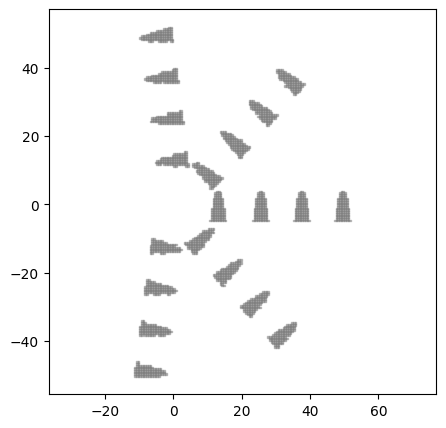

--------------------------------------------------
label: VentHole Chromosome_161: ['DoubleParabolicShape_418', 'CornerTransformation_2']
predict: (0.2895690215315472, 373.1113918, 455.73305429999976)
biased_fitness: 0.61901063095834, fitness: 0.7100875541845294
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 7.868302777121464, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


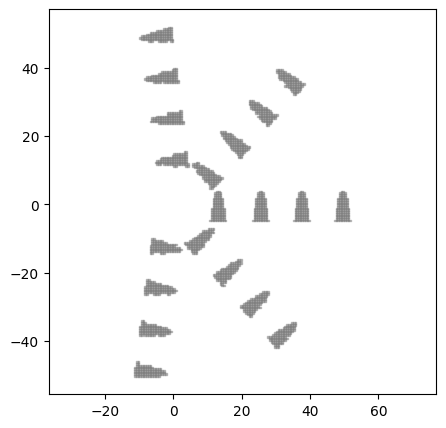

--------------------------------------------------
label: VentHole Chromosome_50: ['DoubleParabolicShape_257', 'CornerTransformation_152']
predict: (0.29005130757129627, 373.13769699999995, 460.0809547999998)
biased_fitness: 0.6034312994018528, fitness: 0.6833936652870385
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 7.868302777121464, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


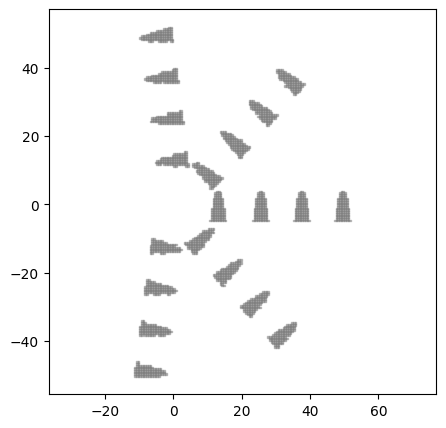

--------------------------------------------------
label: VentHole Chromosome_262: ['DoubleParabolicShape_50', 'CornerTransformation_161']
predict: (0.29009837252776216, 373.8957284999999, 460.16560729999975)
biased_fitness: 0.5988129275113305, fitness: 0.67870959572238
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 7.868302777121464, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


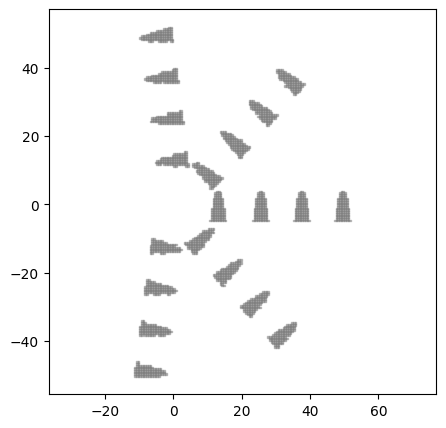

--------------------------------------------------
label: VentHole Chromosome_13: ['DoubleParabolicShape_418', 'CornerTransformation_336']
predict: (0.2907306748556886, 373.24192809999977, 457.4519253999999)
biased_fitness: 0.598657060720361, fitness: 0.6892239839431157
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 7.868302777121464, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


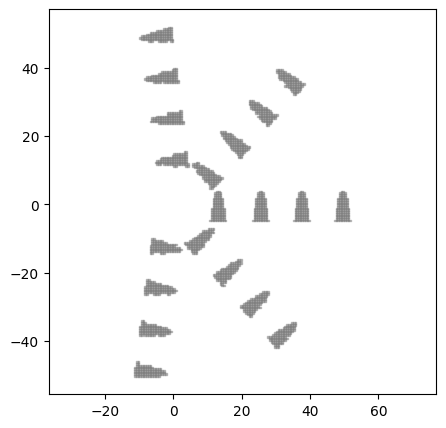

--------------------------------------------------
label: VentHole Chromosome_304: ['DoubleParabolicShape_2', 'GridStrictTransformation_257']
predict: (0.29240358212760387, 373.01973940000005, 458.5020441)
biased_fitness: 0.5742470650135456, fitness: 0.6683552612239612
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


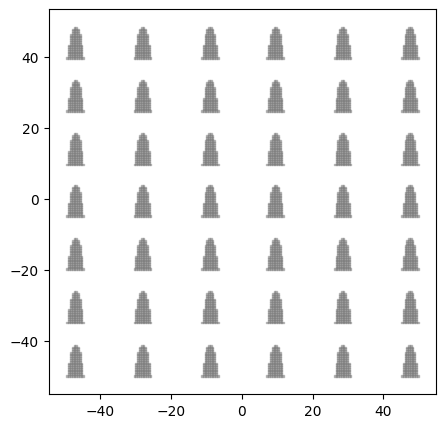

--------------------------------------------------
label: VentHole Chromosome_336: ['DoubleParabolicShape_50', 'CornerTransformation_13']
predict: (0.29009837252776216, 373.8957284999999, 460.16560729999975)
biased_fitness: 0.5988129275113305, fitness: 0.67870959572238
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 7.868302777121464, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


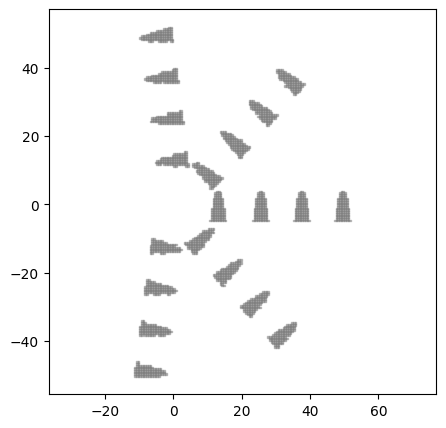

--------------------------------------------------
label: VentHole Chromosome_13: ['DoubleParabolicShape_418', 'CornerTransformation_2']
predict: (0.2896745028441794, 373.54910679999995, 457.01082040000006)
biased_fitness: 0.6127897853814885, fitness: 0.7004553355582059
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 8.086640253584275, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


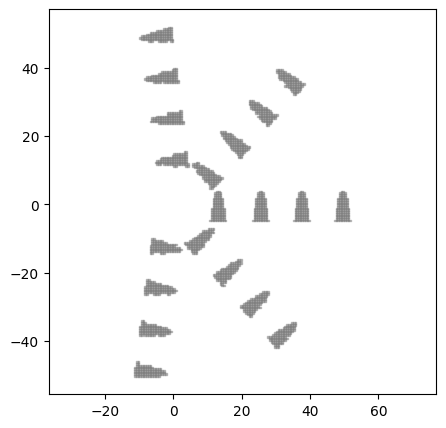

--------------------------------------------------
label: VentHole Chromosome_336: ['DoubleParabolicShape_152', 'CornerTransformation_152']
predict: (0.2897606132655435, 373.75339639999993, 458.1094694999997)
biased_fitness: 0.6083654932823921, fitness: 0.6930795378445669
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 7.868302777121464, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


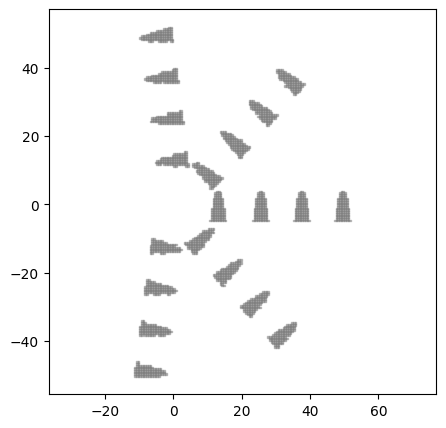

--------------------------------------------------
label: VentHole Chromosome_161: ['DoubleParabolicShape_92', 'CornerTransformation_336']
predict: (0.2897606132655435, 373.75339639999993, 458.1094694999997)
biased_fitness: 0.6083654932823921, fitness: 0.6930795378445669
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 7.868302777121464, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


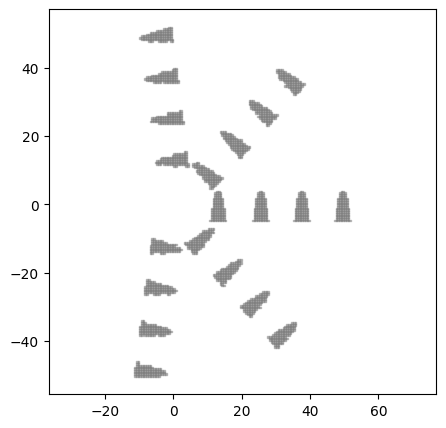

--------------------------------------------------
label: VentHole Chromosome_262: ['DoubleParabolicShape_161', 'GridStrictTransformation_257']
predict: (0.2935841973234008, 374.52272830000004, 464.8554529999996)
biased_fitness: 0.5374966899723892, fitness: 0.6172671202659936
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


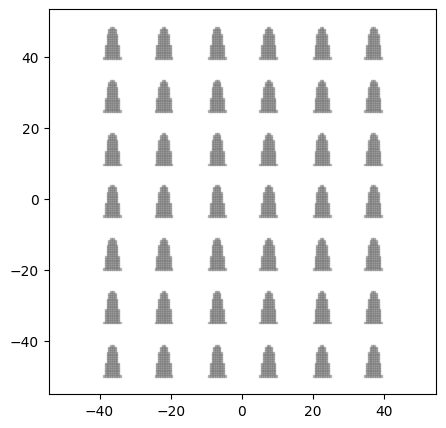

--------------------------------------------------
label: VentHole Chromosome_50: ['DoubleParabolicShape_262', 'CornerTransformation_13']
predict: (0.2897381660263454, 373.53448380000003, 457.834767)
biased_fitness: 0.6103237226311642, fitness: 0.6957720857365458
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 8.086640253584275, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


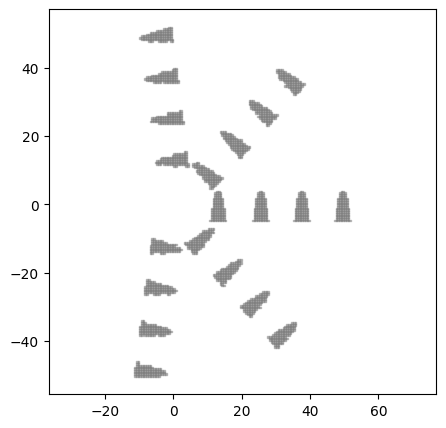

--------------------------------------------------
label: VentHole Chromosome_257: ['DoubleParabolicShape_92', 'CornerTransformation_13']
predict: (0.2896745028441794, 373.54910679999995, 457.01082040000006)
biased_fitness: 0.6127897853814885, fitness: 0.7004553355582059
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 8.086640253584275, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


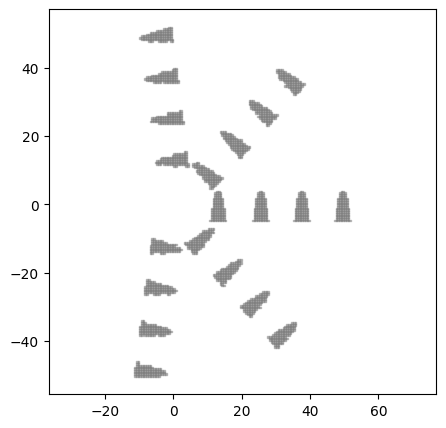

--------------------------------------------------
label: VentHole Chromosome_13: ['DoubleParabolicShape_13', 'GridStrictTransformation_262']
predict: (0.2935841973234008, 374.52272830000004, 464.8554529999996)
biased_fitness: 0.5374966899723892, fitness: 0.6172671202659936
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


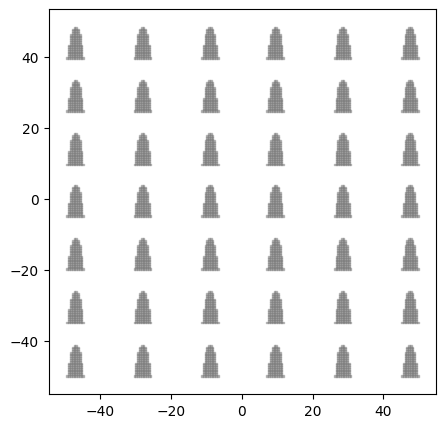

--------------------------------------------------
label: VentHole Chromosome_2: ['DoubleParabolicShape_257', 'CircularStrictTransformation_2']
predict: (0.2902650387881367, 373.73824400000007, 458.7249112)
biased_fitness: 0.6001484145660858, fitness: 0.6850338361186326
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 14.117628975678018, dx: 7.8961360965572975, phi: 0.7853981633974483, ]


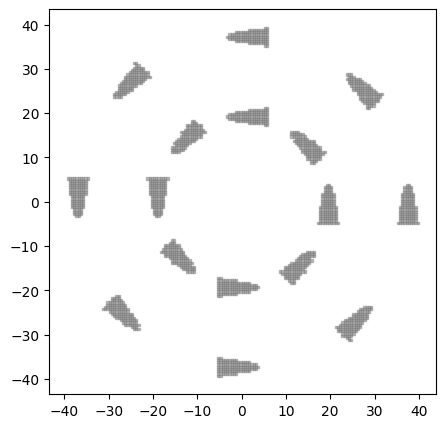

--------------------------------------------------
label: VentHole Chromosome_336: ['DoubleParabolicShape_2', 'GridStrictTransformation_155']
predict: (0.2951776867677789, 373.9372222999999, 460.44456569999994)
biased_fitness: 0.5269371423510959, fitness: 0.6263141923222116
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


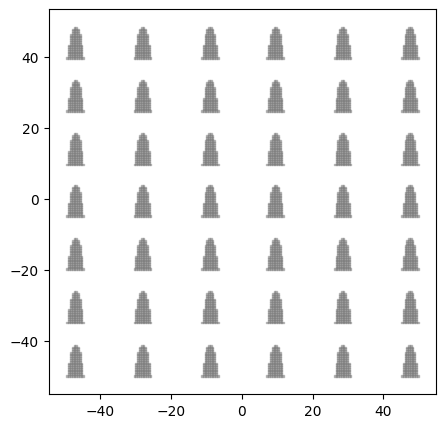

--------------------------------------------------
label: VentHole Chromosome_336: ['DoubleParabolicShape_161', 'CircularStrictTransformation_2']
predict: (0.2929644144789667, 373.213349, 456.0496652999997)
biased_fitness: 0.5703321216944667, fitness: 0.6740407837103345
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 14.117628975678018, dx: 7.8961360965572975, phi: 0.7853981633974483, ]


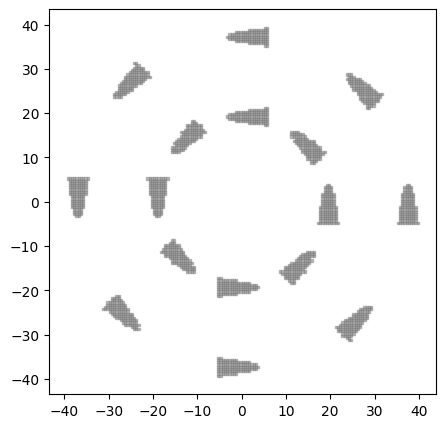

--------------------------------------------------
label: VentHole Chromosome_152: ['DoubleParabolicShape_50', 'GridStrictTransformation_50']
predict: (0.2935841973234008, 374.52272830000004, 464.8554529999996)
biased_fitness: 0.5374966899723892, fitness: 0.6172671202659936
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


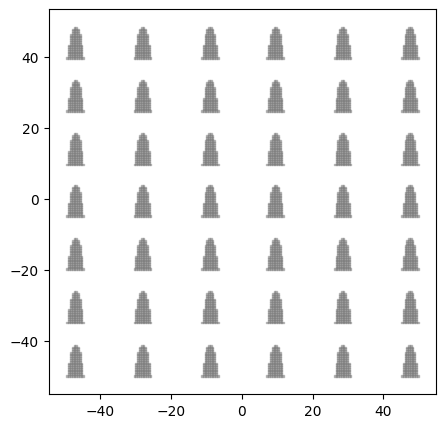

--------------------------------------------------
label: VentHole Chromosome_2: ['DoubleParabolicShape_2', 'GridStrictTransformation_13']
predict: (0.2935841973234008, 374.52272830000004, 464.8554529999996)
biased_fitness: 0.5374966899723892, fitness: 0.6172671202659936
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


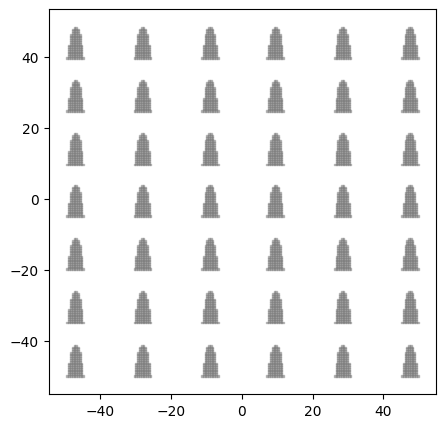

--------------------------------------------------
label: VentHole Chromosome_257: ['DoubleParabolicShape_262', 'GridStrictTransformation_2']
predict: (0.2928405664310896, 373.7500342999998, 457.1903887999999)
biased_fitness: 0.5671011208647471, fitness: 0.6668922201891058
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


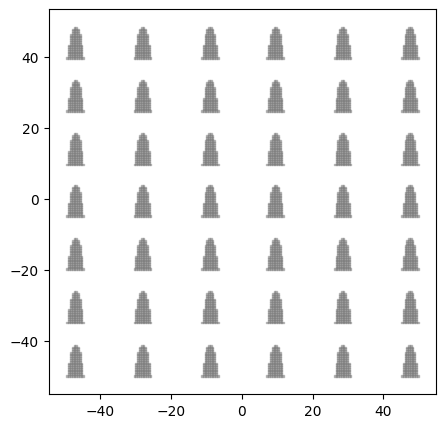

--------------------------------------------------
label: VentHole Chromosome_13: ['DoubleParabolicShape_304', 'GridStrictTransformation_257']
predict: (0.2935841973234008, 374.52272830000004, 464.8554529999996)
biased_fitness: 0.5374966899723892, fitness: 0.6172671202659936
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


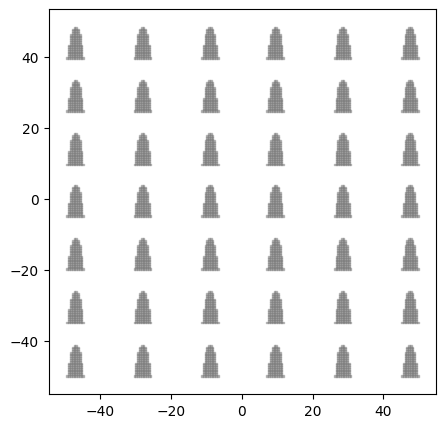

--------------------------------------------------
label: VentHole Chromosome_336: ['DoubleParabolicShape_2', 'GridStrictTransformation_336']
predict: (0.2930450064084895, 373.12440200000003, 457.38174459999965)
biased_fitness: 0.5669844110811472, fitness: 0.6670192029151063
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


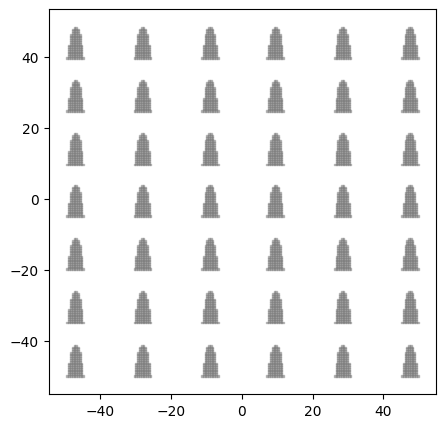

--------------------------------------------------
label: VentHole Chromosome_304: ['DoubleParabolicShape_304', 'GridStrictTransformation_13']
predict: (0.2924269427520132, 372.82756989999984, 458.1191390999998)
biased_fitness: 0.5756466737718163, fitness: 0.6709970274798697
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


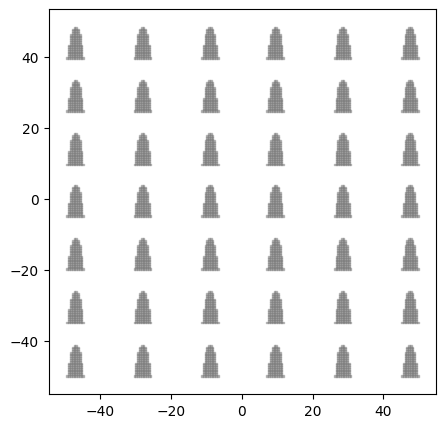

--------------------------------------------------
label: VentHole Chromosome_257: ['DoubleParabolicShape_418', 'GridStrictTransformation_262']
predict: (0.2928690173496138, 373.74722809999986, 455.5426923999998)
biased_fitness: 0.5700122318054079, fitness: 0.6748602240038637
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


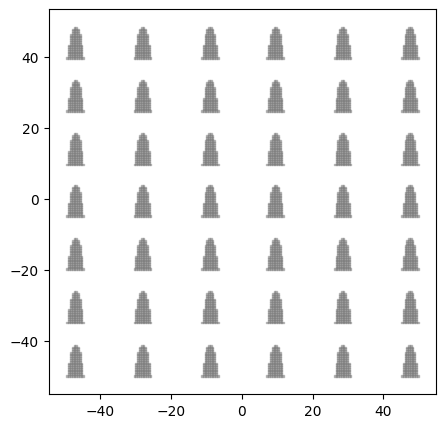

--------------------------------------------------
label: VentHole Chromosome_2: ['DoubleParabolicShape_257', 'CornerTransformation_161']
predict: (0.290101263414978, 373.2194467000001, 458.3313553)
biased_fitness: 0.6058223680903074, fitness: 0.6912333558502195
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 8.086640253584275, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


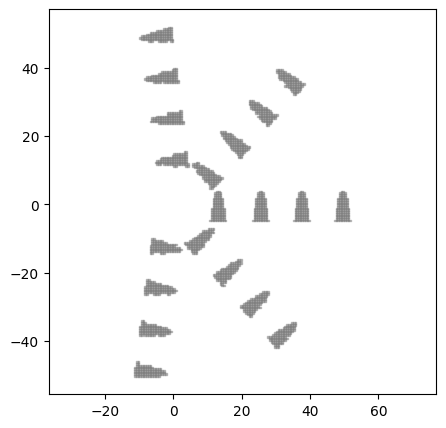

--------------------------------------------------
label: VentHole Chromosome_262: ['DoubleParabolicShape_257', 'CornerTransformation_336']
predict: (0.2899501607012094, 372.8317187999998, 456.99814510000004)
biased_fitness: 0.6125428659830694, fitness: 0.7013490734879068
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 8.086640253584275, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


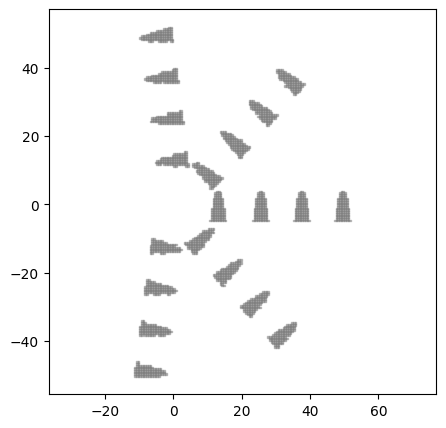

--------------------------------------------------
label: VentHole Chromosome_2: ['DoubleParabolicShape_13', 'GridStrictTransformation_161']
predict: (0.29290894396397293, 372.9582650999999, 455.32611020000013)
biased_fitness: 0.573831238604379, fitness: 0.6794886838602704
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ dx: 8.868287564881056, dy: 4.876134731791569, ]


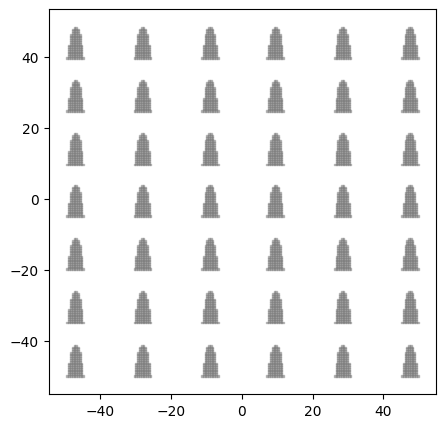

--------------------------------------------------
label: VentHole Chromosome_304: ['DoubleParabolicShape_262', 'CornerTransformation_152']
predict: (0.28852303674906765, 372.9831927000001, 458.7989088)
biased_fitness: 0.6281637044130525, fitness: 0.7058591250093231
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 7.868302777121464, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


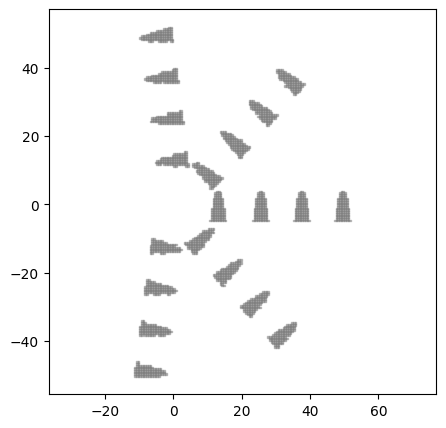

--------------------------------------------------
label: VentHole Chromosome_262: ['DoubleParabolicShape_161', 'CornerTransformation_262']
predict: (0.29009837252776216, 373.8957284999999, 460.16560729999975)
biased_fitness: 0.5988129275113305, fitness: 0.67870959572238
shape parameter:
parameter_list: [ lower_coefficient: 2.938217207234411, upper_coefficient: 2.2151984332017194, lower_y-intercept: 2.5672109573329838, upper_y-intercept_from_lower_y: 1.4149454390877605, lower_x_trans: 3.8993559368336754, ]
pattern parameter:
parameter_list: [ di: 7.868302777121464, dx: 2.2024102157720002, phi: 0.32959825780853685, rot_count: 6.0, ]


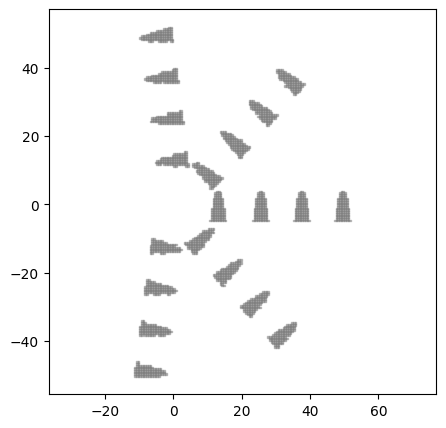

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )